<a href="https://colab.research.google.com/github/ZainAhmadTaufik/TBigData/blob/master/1800018169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perhitungan Jumlah Paket Lelang dan Hasil Lelang Berdasarkan Tahun Anggarannya**

Nama : Zain Ahmad Taufik

NIM  : 180018169

# **Proses EDA (Exploratory Data Analysis) pada Dataset lelang-id-2017-2018**

Proses EDA seharusnya dilakukan untuk semua kolom supaya informasi data, sebaran data diketahui sehingga dapat dilakukan pre-processing sebelum data diolah menggunakan pemrosesan Big Data (misal MapReduce, Transformations dan Actions pada RDD, DataFrame, SpratSQL maupun SparkML(Machine Learning))

Pada proses EDA ini, saya akan memproses data pada kolom nama_paket dan hasil_lelang . Anda di harapkan melakukan proses EDA terhadap data sesuai kolom-kolom yang ada pada dataset yang anda pilih

# **Instalasi Spark pada Google Colab**

Kode di bawah ini hanya dijalankan **satu kali saja** saat runtime pertama kali dijalankan

In [5]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://downloads.apache.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
! tar xf spark-2.4.6-bin-hadoop2.7.tgz
! pip install -q findspark
! pip install pyspark_dist_explore

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

# **Import library Spark yang sudah diinstal**

In [9]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
from matplotlib import pyplot as plt
from pyspark_dist_explore import Histogram, hist

# **Inisialisasi SparkContext dan SparkSession**

In [10]:
sc = spark.sparkContext
spark = SparkSession(sc)

# **Load Dataset**

Dataset berupa file CSV di load. lokasi file csv sama dengan lokasi file kode program

In [11]:
lelang_df = spark.read.csv('lelang-2017-2018.csv', header=True, inferSchema=True)
lelang_df.printSchema()

root
 |-- kode_lelang: string (nullable = true)
 |-- kode_rup: string (nullable = true)
 |-- nama_paket: string (nullable = true)
 |-- kategori3: string (nullable = true)
 |-- kategori4: string (nullable = true)
 |-- tahun_anggaran: string (nullable = true)
 |-- pagu: string (nullable = true)
 |-- hps: string (nullable = true)
 |-- hasil_lelang: string (nullable = true)
 |-- tgl_pengumuman: string (nullable = true)
 |-- tanggal_akhir_lelang: string (nullable = true)
 |-- tanggal_penetapan_pemenang_akhir: string (nullable = true)
 |-- tanggal_kontrak: string (nullable = true)
 |-- tgl_akhir_kontrak: string (nullable = true)
 |-- nama_kabupaten: string (nullable = true)
 |-- nama_propinsi: string (nullable = true)
 |-- nama_pemenang: string (nullable = true)
 |-- alamat_pemenang: string (nullable = true)
 |-- nama_lpse: string (nullable = true)
 |-- nama_satker: string (nullable = true)
 |-- nama_agency: string (nullable = true)
 |-- nama_panitia: string (nullable = true)
 |-- kategori_l

In [69]:
from pyspark.sql.types import StructField, IntegerType, StructType, StringType

data = [
    StructField("kode_lelang", StringType(), True),
    StructField("kode_rup", StringType(), True),
    StructField("nama_paket", IntegerType(), True),
    StructField("kategori3", StringType(), True),
    StructField("kategori4", StringType(), True),
    StructField("tahun_anggaran", StringType(), True),
    StructField("pagu:", StringType(), True),
    StructField("hps:", StringType(), True),
    StructField("hasil_lelang", IntegerType(), True),
]

finalStruct = StructType(fields=data)

lelang_df = spark.read.csv("lelang-2017-2018.csv", header=True, schema=finalStruct)
lelang_df.printSchema()

root
 |-- kode_lelang: string (nullable = true)
 |-- kode_rup: string (nullable = true)
 |-- nama_paket: integer (nullable = true)
 |-- kategori3: string (nullable = true)
 |-- kategori4: string (nullable = true)
 |-- tahun_anggaran: string (nullable = true)
 |-- pagu:: string (nullable = true)
 |-- hps:: string (nullable = true)
 |-- hasil_lelang: integer (nullable = true)



# **1. Proses EDA**

Pertama kita cek jumlah total data lelang yang ada pada dataset lelang-id-2017-2018

In [20]:
print("Total data lelang : ", lelang_df.count())

Total data lelang :  1543893


In [70]:
lelang_df.show(5)

+--------------------+--------------------+----------+---------+---------+--------------+-----+----+------------+
|         kode_lelang|            kode_rup|nama_paket|kategori3|kategori4|tahun_anggaran|pagu:|hps:|hasil_lelang|
+--------------------+--------------------+----------+---------+---------+--------------+-----+----+------------+
|649312,0,Penurapa...|                null|      null|     null|     null|          null| null|null|        null|
|                null|Pekerjaan Konstruksi|      null|     null|     null|          null| null|null|        null|
|                null|                null|      null|     null|     null|          null| null|null|        null|
|"791069,-,Pengada...|                null|      null|     null|     null|          null| null|null|        null|
|855550,11188562,P...|                null|      null|     null|     null|          null| null|null|        null|
+--------------------+--------------------+----------+---------+---------+--------------

Statistik data pada kolom `nama_paket`

In [71]:
lelang_df.select('nama_paket').describe().show()

+-------+-------------------+
|summary|         nama_paket|
+-------+-------------------+
|  count|             155198|
|   mean|6.428680950761801E8|
| stddev|5.007478658756775E8|
|    min|                  0|
|    max|         2147300000|
+-------+-------------------+



Statistik data pada kolom `hasil_lelang`

In [72]:
lelang_df.select('hasil_lelang').describe().show()

+-------+--------------------+
|summary|        hasil_lelang|
+-------+--------------------+
|  count|               92429|
|   mean|1.7151576835280052E8|
| stddev|  3.78538229068332E8|
|    min|                   0|
|    max|          2146250000|
+-------+--------------------+



Statistik Data :

Pada kolom nama_paket dan hasil_lelang memiliki nilai min dan max,yaitu berupa string, sehingga valuenya berupa karakter 

**Persebaran Data pada kolom nama_paket**

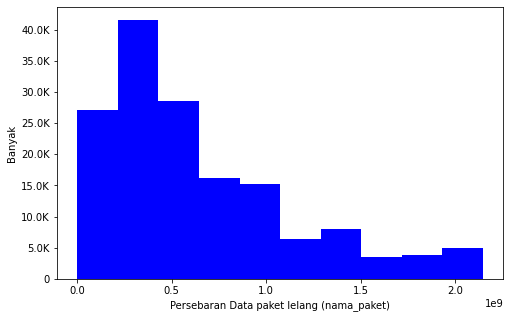

In [73]:
lelang_df_nama_paket = lelang_df.select('nama_paket')

fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
hist(axes, lelang_df_nama_paket, color="blue")
plt.xlabel('Persebaran Data paket lelang (nama_paket)')
plt.ylabel('Banyak')

plt.show()

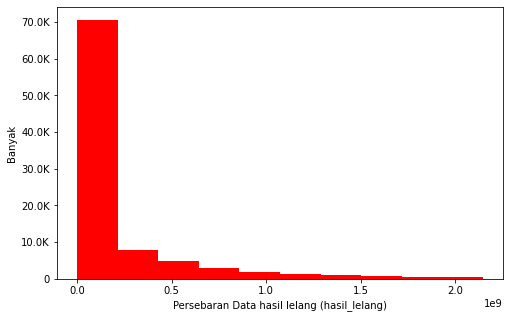

In [74]:
lelang_df_hasil_lelang = lelang_df.select('hasil_lelang')

fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
hist(axes, lelang_df_hasil_lelang, color="red")
plt.xlabel('Persebaran Data hasil lelang (hasil_lelang)')
plt.ylabel('Banyak')

plt.show()

In [75]:
print("Jumlah total data paket lelang dengan kolom nama_paket kosong(null):",lelang_df.where(col("nama_paket").isNull()).count())
print("Jumlah total data hasil lelang dengan kolom hasil_lelang kosong(null):",lelang_df.where(col("hasil_lelang").isNull()).count())

Jumlah total data paket lelang dengan kolom nama_paket kosong(null): 1388695
Jumlah total data hasil lelang dengan kolom hasil_lelang kosong(null): 1451464


## **2. PRE PROCESSING**

In [76]:
mean_age = lelang_df.agg(avg(col("nama_paket"))).first()
print("rata-rata data paket lelang", mean_age[0])
lelang_df = lelang_df.na.fill(mean_age[0], ["nama_paket"])

rata-rata data paket lelang 642868095.0761801


In [77]:
mean_age = lelang_df.agg(avg(col("hasil_lelang"))).first()
print("rata-rata data hasil lelang ", mean_age[0])
lelang_df = lelang_df.na.fill(mean_age[0], ["hasil_lelang"])

rata-rata data hasil lelang  171515768.35280052


setelah mengisi data ```null``` dengan nilai rata-rata, sekarang kita cek apakah masih ada data yang kosong

In [78]:
print("Jumlah total data paket lelang dengan kolom nama_paket kosong(null):")
lelang_df.where(col("nama_paket").isNull()).count()

Jumlah total data paket lelang dengan kolom nama_paket kosong(null):


0

In [79]:
print("Jumlah total data hasil lelang dengan kolom hasil_lelang kosong(null):")
lelang_df.where(col("hasil_lelang").isNull()).count()

Jumlah total data hasil lelang dengan kolom hasil_lelang kosong(null):


0

In [80]:
lelang_df.select('nama_paket','hasil_lelang').describe().show()

+-------+--------------------+-------------------+
|summary|          nama_paket|       hasil_lelang|
+-------+--------------------+-------------------+
|  count|             1543893|            1543893|
|   mean| 6.425533009974804E8|1.714427624673601E8|
| stddev|1.4222237761233376E7|  4732733.478381879|
|    min|                   0|                  3|
|    max|           642868095|         1638384000|
+-------+--------------------+-------------------+



## **3. PEMROSESAN DATA**

In [81]:
# seleksi data
lelang_df = lelang_df.select('nama_paket','tahun_anggaran','hasil_lelang')

lelang_df.show(10)

+----------+--------------+------------+
|nama_paket|tahun_anggaran|hasil_lelang|
+----------+--------------+------------+
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
| 642868095|          null|   171515768|
+----------+--------------+------------+
only showing top 10 rows



In [101]:
# filter data paket lelang berdasarkan tahun anggaranya
data_2017 = lelang_df.filter(lelang_df.tahun_anggaran=='2017').count()

# filter data paket lelang berdasarkan tahun anggaranya
data_2018 = lelang_df.filter(lelang_df.tahun_anggaran=='2018').count()

# hitung jumlah paket berdasarkan tahun anggaran
print("Jumlah data pada tahun 2017   : ", data_2017)
print("Jumlah data pada tahun 2018   : ", data_2018)

# hitung rata-rata paket lelang berdasarkan jenis tahun anggarannya
rata_rata_plelang = lelang_df.groupBy('tahun_anggaran').avg('nama_paket').show()


Jumlah data pada tahun 2017   :  12950
Jumlah data pada tahun 2018   :  14143
+--------------+--------------------+
|tahun_anggaran|     avg(nama_paket)|
+--------------+--------------------+
|         43462|         4.7409575E8|
|         43085| 8.049281038461539E8|
|         42923|     6.37185319996E8|
|         42776| 5.774724945416666E8|
|         42688|        1.35530878E9|
|            07|                 5.0|
|         43341|  7.04613890391705E8|
|         42975|  6.88916972722973E8|
|         41075| 4.045263333333333E8|
|         43044|          1.316783E9|
|         42917|2.6671071785555556E8|
|         41074|           1.76775E8|
|         43258|  7.58265795338983E8|
|         43040| 6.488479110039841E8|
|         42937| 6.470261974589148E8|
|         43429| 6.710133333333334E8|
|         43375| 6.428733495564516E8|
|         43336| 6.169115362973856E8|
|         43185| 6.667314876854838E8|
|         42974|  2.85263962962963E8|
+--------------+--------------------+
only showi